In [ ]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from skimage.filters import gaussian
import pandas as pd

IMG_WIDTH = 28
IMG_HEIGHT = 28

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
def run(infile_dir, outfile_dir, outdir, label=None):
    inpath = Path(f"{infile_dir}")
    outpath = Path(f"{outfile_dir}")

    if not os.path.isdir(outdir):
        os.mkdir(outdir)

    with inpath.open("r") as infile, outpath.open("w") as outfile:
        # parse file
        reader = csv.DictReader(infile)
        writer = csv.DictWriter(outfile, ["img_dir", "label"])
        writer.writeheader()

        fieldnames = None

        for i, row in enumerate(reader):
            if fieldnames is None:
                fieldnames = [x for x in reader.fieldnames if x != 'label']
            
            # print(fieldnames)
            label_val = row['label']
            pixels = [row[x] for x in fieldnames]

            array = np.array(pixels, dtype=np.uint8)
            array = array.reshape((IMG_WIDTH, IMG_HEIGHT))

            img_dir= f'{outdir}/{i}.jpg'
            plt.imsave(img_dir, array)
            new_row = {"img_dir": img_dir, "label": label_val}
            writer.writerow(new_row)

In [ ]:
!rm -rf large_test
!rm -rf large_train img_data

In [ ]:
# MNIST dataset
run("./mnist_train.csv", "./large_train.csv", "./large_train")
run("./mnist_test.csv", "./large_test.csv", "./large_test")

In [ ]:
# Fashion MNIST dataset
run("./fashion-mnist_train.csv", "./large_train.csv", "./large_train")
run("./fashion-mnist_test.csv", "./large_test.csv", "./large_test")

In [ ]:
train_list = os.listdir('./large_train')
test_list = os.listdir('./large_test')
train_df = pd.read_csv('./large_train.csv')
test_df = pd.read_csv('./large_test.csv')
assert(len(train_list) == 60000)
assert(len(test_list) == 10000)
assert(len(train_df.index) == 60000)
assert(len(test_df.index) == 10000)

In [ ]:
!zip -r /content/large_train.zip /content/large_train
!zip -r /content/large_test.zip /content/large_test
from google.colab import files
files.download("/content/large_train.zip")
files.download("/content/large_test.zip")

Streaming output truncated to the last 5000 lines.
  adding: content/large_train/3757.jpg (deflated 18%)
  adding: content/large_train/32408.jpg (deflated 19%)
  adding: content/large_train/16537.jpg (deflated 19%)
  adding: content/large_train/27066.jpg (deflated 18%)
  adding: content/large_train/33104.jpg (deflated 20%)
  adding: content/large_train/54871.jpg (deflated 21%)
  adding: content/large_train/21340.jpg (deflated 20%)
  adding: content/large_train/38408.jpg (deflated 20%)
  adding: content/large_train/19931.jpg (deflated 17%)
  adding: content/large_train/13558.jpg (deflated 21%)
  adding: content/large_train/51150.jpg (deflated 18%)
  adding: content/large_train/17043.jpg (deflated 19%)
  adding: content/large_train/49098.jpg (deflated 20%)
  adding: content/large_train/27450.jpg (deflated 20%)
  adding: content/large_train/37806.jpg (deflated 20%)
  adding: content/large_train/49991.jpg (deflated 17%)
  adding: content/large_train/18415.jpg (deflated 19%)
  adding: conte

FileNotFoundError: ignored

In [ ]:
print(os.listdir('large_train')[0])

57730.jpg


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  after removing the cwd from sys.path.


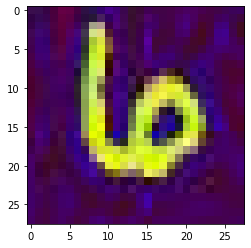

In [ ]:
img_name = os.listdir('large_train')[5]
img_path = 'large_train/'+f'{img_name}'
img = plt.imread(img_path)
img = gaussian(img, sigma=0, mode='constant', cval=0.0)
plt.imshow(img)

#### Dataset

In [ ]:
def get_age(label):
    # Mean range from [5,50]
    mean = (label+1)*5
    var = 1
    age = np.random.normal(loc=mean, scale=var).astype(int)
    return age

In [ ]:
# store the new dataframe with a new label 'Age'
def get_csv(train_csv, valid_csv):
    # read in the csv file
    trdf = pd.read_csv(train_csv)
    vdf = pd.read_csv(valid_csv)
    df = trdf.append(vdf)

    del trdf, vdf
    df['Age'] = get_age(df['label'])

    random_seed = 0
    rng = np.random.RandomState(random_seed)
    idx_list = rng.choice(len(df.index), 2000, replace = False).tolist()
    df = df.iloc[idx_list]
    df.to_csv('./final.csv', index=False)

In [ ]:
# Prepare the dataset
get_csv('./large_train.csv', './large_test.csv')

In [ ]:
def get_small_data(in_csv, out_csv, out_dir):
    inpath = Path(f"{in_csv}")
    outpath = Path(f"{out_csv}")

    if not os.path.isdir(out_dir):
        os.mkdir(out_dir)
    with inpath.open("r") as infile, outpath.open("w") as outfile:
        reader = csv.DictReader(infile)
        writer = csv.DictWriter(outfile, ["img_dir", "label", "Age"])
        writer.writeheader()

        for i, row in enumerate(reader):
            img_dir = row['img_dir']
            age = row['Age']
            img = plt.imread(img_dir)
            scale = int(age)/10
            # print(scale)
            img = gaussian(img, sigma=scale, mode='constant', cval=0.0)


            img_dir= f'./{out_dir}/{i}.jpg'
            plt.imsave(img_dir, img)
            new_row = {"img_dir": img_dir, "label": row['label'], "Age": row['Age']}
            writer.writerow(new_row)

In [ ]:
get_small_data('./final.csv', './new_final.csv', 'img_data' )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.


In [ ]:
img_data_list = os.listdir('./img_data')
assert(len(img_data_list) == 2000)

In [ ]:
df = pd.read_csv('./new_final.csv')
print(df.head())

            img_dir  label  Age
0  ./img_data/0.jpg      0    5
1  ./img_data/1.jpg      4   23
2  ./img_data/2.jpg      1   10
3  ./img_data/3.jpg      2   14
4  ./img_data/4.jpg      7   38


In [ ]:
!zip -r ./fmnist_data.zip /content/img_data
from google.colab import files
files.download("fmnist_data.zip")

####Dataset

In [ ]:
df = pd.read_csv('new_final.csv')
print(df.columns)

Index(['img_dir', 'label', 'Age'], dtype='object')


In [ ]:
def read_decode_jpg(file_path):
	img = tf.io.read_file(file_path)
	img = tf.image.decode_jpeg(img, channels=3)  # Decode a JPEG-encoded image to a uint8 tensor.
	return img

def read_decode_png(file_path):
	img = tf.io.read_file(file_path)
	img = tf.image.decode_png(img, channels=1)  # output a grayscale image
	return img

In [ ]:
def read_img(img_path, label):
    img = read_decode_jpg(img_path)
    img = tf.image.resize(img, [32, 32])
    img = img / 255
    print(img.shape)
    return img, label

In [ ]:
def create_dataset(df):
    img_path = df['img_dir'].values
    age_label = df['Age'].values

    ds = tf.data.Dataset.from_tensor_slices((img_path, age_label))
    ds = ds.map(read_img).batch(64)
    return ds

In [ ]:
# create the training(70), validation(20), and testing(10) dataset
def get_datasets(in_csv, params):
    rng = np.random.RandomState(params['random_seed'])
    df = pd.read_csv(in_csv)

    # split into train_val and test
    tr_val_candidates = rng.choice(df.img_dir,
                                   size=int(len(df.img_dir)*0.8),
                                   replace=False).tolist()
    ts_candidates = list(set(df.img_dir)-set(tr_val_candidates))

    # split into train and val
    tr_candidates = rng.choice(tr_val_candidates,
                               size = int(len(df.img_dir)*0.77),
                               replace=False).tolist()
    val_candidates = list(set(tr_val_candidates)-set(tr_candidates))

    tr_candidates_df = df[(df.img_dir.isin(tr_candidates))].reset_index(drop=True)
    val_candidates_df = df[(df.img_dir.isin(val_candidates))].reset_index(drop=True)
    ts_candidates_df = df[(df.img_dir.isin(ts_candidates))].reset_index(drop=True)
 
    train_ds = create_dataset(tr_candidates_df)
    valid_ds = create_dataset(val_candidates_df)
    test_ds = create_dataset(ts_candidates_df)

    return train_ds, valid_ds, test_ds

In [ ]:
params = {}
params['random_seed'] = 0

In [ ]:
train_ds, valid_ds, test_ds = get_datasets('new_final.csv', params)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


#### Model

In [ ]:
# Model: ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
pre_trained_model = ResNet50(input_shape=(32, 32, 3), 
                             include_top=False, 
                             weights='imagenet')

last_layer = pre_trained_model.get_layer('conv5_block3_3_conv')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output 

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='linear')(x)  
res50_model = Model(pre_trained_model.input, x) 

res50_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
last layer output shape:  (None, 1, 1, 2048)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]

In [ ]:
# Model: VGG16
from tensorflow.keras.applications.vgg16 import VGG16
pre_trained_model = VGG16(input_shape=(32, 32, 3), 
                          include_top=False, 
                          weights='imagenet')
pre_trained_model.summary()
last_layer = pre_trained_model.get_layer('block5_conv3')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='linear')(x)  
vgg16_model = Model(pre_trained_model.input, x) 

vgg16_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [ ]:
vgg16_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
history = vgg16_model.fit(train_ds, epochs=10, validation_data=valid_ds)

Epoch 1/10
25/25 [==============================] - 14s 144ms/step - loss: 2720.2419 - accuracy: 0.0000e+00 - val_loss: 108.6436 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 2s 81ms/step - loss: 60.1665 - accuracy: 0.0000e+00 - val_loss: 23.3143 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 2s 82ms/step - loss: 15.8350 - accuracy: 0.0000e+00 - val_loss: 69.1638 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 2s 82ms/step - loss: 21.9261 - accuracy: 0.0000e+00 - val_loss: 33.8861 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 2s 81ms/step - loss: 13.8580 - accuracy: 0.0000e+00 - val_loss: 16.0338 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 2s 80ms/step - loss: 8.2037 - accuracy: 0.0000e+00 - val_loss: 26.3129 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 2s 81ms/step - loss: 9.7479 - accuracy

In [ ]:
vgg16_model.evaluate(test_ds)

7/7 [==============================] - 1s 103ms/step - loss: 11.6766 - accuracy: 0.0000e+00


[11.676587104797363, 0.0]

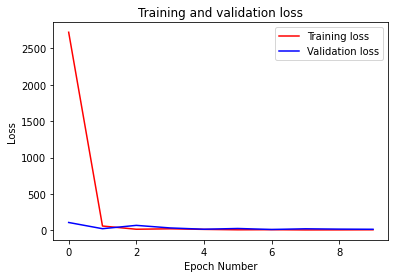

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig1 = plt.gcf()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend(loc=0)
plt.savefig('age_plot.png')